In [1]:

import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df=df.replace("LF", "Low Fat")

In [4]:
df=df.replace("low fat", "Low Fat")

In [5]:
df=df.replace("reg","Regular")

In [6]:
le1 = preprocessing.LabelEncoder()
le1.fit(df["Item_Identifier"])
Item_Identifier=le1.transform(df["Item_Identifier"])
df["Item_Identifier"]=Item_Identifier

In [7]:
le2 = preprocessing.LabelEncoder()
le2.fit(df["Item_Fat_Content"])
Item_Fat_Content=le2.transform(df["Item_Fat_Content"])
df["Item_Fat_Content"]=Item_Fat_Content

In [8]:
le3 = preprocessing.LabelEncoder()
le3.fit(df["Item_Type"])
Item_Type=le3.transform(df["Item_Type"])
df["Item_Type"]=Item_Type

In [9]:
le4 = preprocessing.LabelEncoder()
le4.fit(df["Outlet_Identifier"])
Outlet_Identifier=le4.transform(df["Outlet_Identifier"])
df["Outlet_Identifier"]=Outlet_Identifier

In [10]:
#since around 2500 values are missing not considering this attribute
#df=df.drop(['Outlet_Size'], axis=1)

In [11]:
le5 = preprocessing.LabelEncoder()
le5.fit(df["Outlet_Location_Type"])
Outlet_Location_Type=le5.transform(df["Outlet_Location_Type"])
df["Outlet_Location_Type"]=Outlet_Location_Type

In [12]:
le6 = preprocessing.LabelEncoder()
le6.fit(df["Outlet_Type"])
Outlet_Type=le6.transform(df["Outlet_Type"])
df["Outlet_Type"]=Outlet_Type

In [13]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,NaN,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052


In [14]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.048833,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.003656,-0.001178,0.002869
Item_Weight,0.048833,1.000000,-0.023238,-0.014048,0.030765,0.027141,-0.007995,-0.011588,0.004715,-0.001088,0.014123
Item_Fat_Content,-0.114660,-0.023238,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.014048,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.030765,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.027141,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007995,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.011588,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,-0.089216,-0.122304,-0.049135
Outlet_Location_Type,0.003656,0.004715,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,1.000000,0.467219,0.089367
Outlet_Type,-0.001178,-0.001088,0.002199,-0.173468,0.003053,-0.001975,0.099873,-0.122304,0.467219,1.000000,0.401522


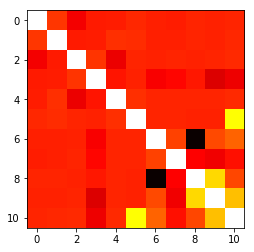

In [15]:
plt.imshow(df.corr(),cmap='hot',interpolation='nearest')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0,np.mean(df['Item_Visibility']))

In [18]:
df['Outlet_Size'].fillna('Small',inplace=True)
df['Outlet_Establishment_Year'] = 2019 - df['Outlet_Establishment_Year']

In [19]:
mylist = list(df.select_dtypes(include=['object']).columns)

dummies = pd.get_dummies(df[mylist], prefix= mylist)

df.drop(mylist, axis=1, inplace = True)

X = pd.concat([df,dummies], axis =1 )

In [20]:
mylist

['Outlet_Size']

In [21]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,156,9.30,0,0.016047,4,249.8092,9,20,0,1,3735.1380,0,1,0
1,8,5.92,1,0.019278,14,48.2692,3,10,2,2,443.4228,0,1,0
2,662,17.50,0,0.016760,10,141.6180,9,20,0,1,2097.2700,0,1,0
3,1121,19.20,1,0.066132,6,182.0950,0,21,2,0,732.3800,0,0,1
4,1297,8.93,0,0.066132,9,53.8614,1,32,2,1,994.7052,1,0,0


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
X.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
Item_Identifier,1.000000,0.048833,-0.114660,-0.029189,-0.017973,0.012853,-0.008602,0.012772,0.003656,-0.001178,0.002869,0.000088,-0.001905,0.001748
Item_Weight,0.048833,1.000000,-0.023238,-0.020416,0.030765,0.027141,-0.007995,0.011588,0.004715,-0.001088,0.014123,0.012473,0.004862,-0.013016
Item_Fat_Content,-0.114660,-0.023238,1.000000,0.049915,-0.139434,0.006063,0.000764,-0.003151,-0.001598,0.002199,0.018719,-0.002132,0.004671,-0.003079
Item_Visibility,-0.029189,-0.020416,0.049915,1.000000,-0.036000,-0.005259,-0.106377,0.078355,-0.027859,-0.179604,-0.134138,-0.043639,-0.083902,0.106851
Item_Type,-0.017973,0.030765,-0.139434,-0.036000,1.000000,0.032651,0.001656,-0.004970,0.003084,0.003053,0.017048,-0.003507,0.004981,-0.002507
Item_MRP,0.012853,0.027141,0.006063,-0.005259,0.032651,1.000000,0.003319,-0.005020,0.000232,-0.001975,0.567574,0.002438,-0.004510,0.002734
Outlet_Identifier,-0.008602,-0.007995,0.000764,-0.106377,0.001656,0.003319,1.000000,-0.079035,-0.716176,0.099873,0.162325,-0.459730,0.232580,0.069160
Outlet_Establishment_Year,0.012772,0.011588,-0.003151,0.078355,-0.004970,-0.005020,-0.079035,1.000000,0.089216,0.122304,0.049135,0.453388,0.016346,-0.300724
Outlet_Location_Type,0.003656,0.004715,-0.001598,-0.027859,0.003084,0.000232,-0.716176,0.089216,1.000000,0.467219,0.089367,0.382481,0.190005,-0.420441
Outlet_Type,-0.001178,-0.001088,0.002199,-0.179604,0.003053,-0.001975,0.099873,0.122304,0.467219,1.000000,0.401522,-0.088530,0.701810,-0.608408


In [24]:
reg = LinearRegression()

In [25]:
df1 = X.drop('Item_Outlet_Sales',1)
X1 = df1.drop('Item_Weight',1)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X1,df.Item_Outlet_Sales, test_size =0.2)

In [27]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
x_train.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
6102,752,0,0.209143,10,190.9530,4,34,0,0,0,0,1
30,1048,0,0.170349,4,55.7956,0,21,2,0,0,0,1
3055,1224,0,0.172365,0,144.8470,0,21,2,0,0,0,1
1316,1203,0,0.047964,13,185.0898,9,20,0,1,0,1,0
4788,716,0,0.021420,2,232.0326,7,17,1,1,0,0,1


In [29]:
ypred=reg.predict(x_test)

In [30]:
mse = np.mean((ypred - y_test)**2)

In [31]:
mse

1417394.5081060932

In [32]:
reg.score(x_test,y_test)

0.5363116706593449

In [33]:
tdf=pd.read_csv("test.csv")

In [34]:
tdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [35]:
tdf=tdf.replace("LF", "Low Fat")
tdf=tdf.replace("low fat", "Low Fat")
tdf=tdf.replace("reg","Regular")
tdf=tdf.drop('Item_Weight',1)
LE1 = preprocessing.LabelEncoder()
LE1.fit(tdf["Item_Identifier"])
Item_Identifier=LE1.transform(tdf["Item_Identifier"])
tdf["Item_Identifier"]=Item_Identifier
LE2 = preprocessing.LabelEncoder()
LE2.fit(tdf["Item_Fat_Content"])
Item_Fat_Content=LE2.transform(tdf["Item_Fat_Content"])
tdf["Item_Fat_Content"]=Item_Fat_Content
LE3 = preprocessing.LabelEncoder()
LE3.fit(tdf["Item_Type"])
Item_Type=LE3.transform(tdf["Item_Type"])
tdf["Item_Type"]=Item_Type
LE4 = preprocessing.LabelEncoder()
LE4.fit(tdf["Outlet_Identifier"])
Outlet_Identifier=LE4.transform(tdf["Outlet_Identifier"])
tdf["Outlet_Identifier"]=Outlet_Identifier
LE5 = preprocessing.LabelEncoder()
LE5.fit(tdf["Outlet_Location_Type"])
Outlet_Location_Type=LE5.transform(tdf["Outlet_Location_Type"])
tdf["Outlet_Location_Type"]=Outlet_Location_Type
LE6 = preprocessing.LabelEncoder()
LE6.fit(tdf["Outlet_Type"])
Outlet_Type=LE6.transform(tdf["Outlet_Type"])
tdf["Outlet_Type"]=Outlet_Type
tdf['Item_Visibility'] = tdf['Item_Visibility'].replace(0,np.mean(tdf['Item_Visibility']))
tdf['Outlet_Size'].fillna('Small',inplace=True)
tdf['Outlet_Establishment_Year'] = 2019 - tdf['Outlet_Establishment_Year']
mylist = list(tdf.select_dtypes(include=['object']).columns)
print(mylist)
dummies = pd.get_dummies(tdf[mylist], prefix= mylist)

tdf.drop(mylist, axis=1, inplace = True)

Xt = pd.concat([tdf,dummies], axis =1 )


['Outlet_Size']


In [36]:
Xt

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,1103,0,0.007565,13,107.8622,9,20,0,1,0,1,0
1,1067,1,0.038428,4,87.3198,2,12,1,1,0,0,1
2,1406,0,0.099575,11,241.7538,0,21,2,0,0,0,1
3,809,0,0.015388,13,155.0340,2,12,1,1,0,0,1
4,1184,1,0.118599,4,234.2300,5,34,2,3,0,1,0
5,461,1,0.063817,6,117.1492,8,22,0,1,0,0,1
6,604,1,0.082602,0,50.1034,3,10,2,2,0,1,0
7,266,0,0.015782,0,81.0592,5,34,2,3,0,1,0
8,668,1,0.123365,13,95.7436,7,17,1,1,0,0,1
9,170,0,0.005698,0,186.8924,2,12,1,1,0,0,1


In [37]:
ytest=reg.predict(Xt)

In [38]:
ytest

array([1581.48805277, 1237.93173675, 1725.23725021, ..., 1923.00695125,
       3188.99139288, 1346.5537168 ])

In [39]:
for i in ytest:
    print(i)

1581.4880527696596
1237.9317367502827
1725.2372502094777
2239.2648065039207
4946.394611887356
2223.0528049357995
1091.7033144135094
2570.9698519354215
1565.0242236936274
2742.8363175925956
1609.5139487478536
1369.5752350923203
2297.7806092581645
1749.5713104760962
897.4250587494698
2267.83105226417
3162.7237434661847
3256.630158735542
3019.61431662471
877.7183166475911
2745.0933330766393
3681.342575603371
1084.4900432119257
880.6351634911223
2862.6556366076566
1319.9095039007552
802.5915216845228
2846.082111226824
4148.879039385781
1869.5540687311377
-862.5774239634204
3393.363648487817
980.712203655638
4756.311410927806
2335.041891431011
4564.918290011253
2520.606937120744
-235.42012760264686
2773.003810574515
2929.2165808224204
2531.9902303644403
-198.4250260031837
2425.2688980460457
2564.7232034821645
1371.0251276587333
1759.1715723237958
-1320.4453747433058
2903.999926388622
3836.4975146821116
2281.214012653688
1213.3892852610952
1676.4420734664736
2686.5773796081303
1722.792849727

664.7172176733861
3300.265920045824
1575.6713816776146
1988.4529304459365
1886.2688964901135
2947.4618987279887
2765.684352283402
3315.2604584550018
1813.4925006402073
3943.752689062131
3200.6479571795426
4067.4085352891443
653.7959551643062
4987.71256726825
3325.7675577676646
2954.785581149601
859.3551739774803
1790.7603579545753
2646.592236058604
2015.3094842962546
1840.1936344220471
2287.1588062386036
1459.8192038572474
3663.6222365839067
2072.5132871785695
2632.9397089685667
1309.1930408975136
3236.1466030745614
1943.7311059013773
4130.469564751889
2238.9746193554047
1492.8117184792568
2881.009878686665
1206.2666584490698
3741.5978275623575
3104.3418639829447
-1422.2399796690102
1208.5804710398934
2502.925957819926
3336.192794551959
2600.52780576126
2808.3192202742252
3814.7442477099094
2117.9662834725523
1941.7117989963972
1206.816939074597
747.0657278538015
2987.698175499341
1679.7245945771797
1742.6947611140336
3552.0754696542563
638.7577718730022
1852.8903802281861
2569.6003465

1619.0337852990087
1068.7652603404563
2908.6001985548505
831.4326612467216
1378.885718284262
2174.0790205007734
1766.3320983740646
-1061.675017796573
2860.138162168208
694.051972986816
2690.1242130332002
2547.7836320456404
2691.9506376210616
3818.387513427484
1707.332855459179
2562.7808470390387
3994.844783307196
2200.710408432231
1085.795795634444
2687.002602259921
2741.6704404501324
1203.1538002144016
2327.5327035882237
4245.462348268127
3292.8281589922053
2028.9941378809253
3082.068493548226
1922.84278210219
2720.5483190337127
3632.867408390841
1457.4487363952217
2363.6104933019574
4181.1650975618295
2732.4367193981716
3929.0548493196593
3089.4028130144457
3769.674986071559
2423.4359505877915
3106.87278427401
2216.744579635597
2437.1083623033546
2639.3148708776052
4220.91599743826
667.042774703722
2181.1279565056293
1735.753519319183
-655.1709615580021
3087.9271480395446
1070.143820822374
2836.8785389465215
1270.525154955605
2647.4016167087975
2272.917340580373
-442.4636153219883
25

3138.060801573959
1604.206745040257
3773.4553644487432
3985.593349638759
1055.3906574258167
3061.6502424120854
1394.512097368231
1107.637419705109
1450.4946623935402
1369.9903260784267
2484.815701395997
2356.6850067485757
3847.8699787142177
3706.262303817519
938.5887368309789
2523.0925271179062
2566.9867300523056
2232.9562693899843
664.5674576185309
2489.4318750685725
-527.2092757721332
2612.397843999549
1433.9134812489374
4151.8177905873845
1011.743275476219
772.0305007432912
3633.0354655715137
2862.849296800907
2982.6344565545246
3926.10277609259
1672.429847004707
4794.531740265243
714.2313515615019
2089.6258526140873
1918.6178235634811
3444.592947855758
3770.5609008188158
4414.126938511299
1879.878138480702
1841.1346312342498
595.5091479188363
1159.0358890851471
3119.1878257155768
2426.730478084553
4066.269905293836
1850.3300137255937
1294.5920470955189
1737.274641375273
2172.4911558991635
841.6497932624734
4197.0605898904405
3303.6388871100653
2347.5749485755837
3051.379998199598
8

2732.950545356286
3119.8017357175772
933.4532753223011
1802.953946207082
1149.7893576747983
3247.611274009064
1864.9011949390915
2436.0351534266633
2076.3919835139927
2290.6854962869716
3712.712255705862
3239.874604139969
638.374323812589
1426.8101116026455
3204.295860638912
-875.9311580506444
3322.4726247884164
2671.9616281962208
828.7727680242535
2786.4024899303854
1061.197590017389
1912.4516524843439
2640.235206109578
2893.935178076568
29.817284335613408
3865.9830393735137
3064.337042765363
3277.616048963703
926.752183415324
1068.2483422597318
2778.379193940452
2891.170757481305
1693.7140896117962
769.1243019907449
3803.591646087696
-532.1856493020916
3747.529026441126
2106.1008866232805
2448.176890785342
2364.016363252551
1287.0201754277223
2601.951312788289
1017.3674564389091
378.8337441341953
3257.5736693565786
4598.039233666281
1670.2349254169458
2957.963746558081
4093.0633404023565
3639.770213145918
2632.6961497207963
5368.046727674428
5.587811188101
1646.8756092855829
2220.274

5373.2257174765955
769.1441804313304
2433.3738894447843
2678.9753008956513
1175.4425467876854
1928.3290757629297
592.0678054833513
1693.6338025611408
4019.070841522973
2919.2140933133132
1352.4580221690953
2656.3419108413746
3635.467608547907
1713.756245777411
2054.2024250912596
2964.499692370799
1770.1971923914439
3132.370796331253
896.8402867496861
2441.551894962801
2127.3335648602597
1824.0042315552428
-429.80501306403994
3015.45983152608
3417.9457765752713
1891.5269154673356
2467.152640016159
1230.8214767417767
1111.030946024302
573.5182918626022
863.8099807505123
748.1204319440171
654.4554259397448
3201.8402957734806
994.638247996832
2737.9462507002518
1955.7583540681367
1120.051317072172
2645.7619004667595
3518.3082152140732
2766.8547580152913
2645.1533165475166
2604.9461598644066
3542.6718694995097
2830.042071377232
29.2798554071004
1556.5995724831205
-359.3568028422278
3135.086753007833
3170.4767417473804
2101.208621349335
1906.9461737431893
4232.454505932415
2891.8417675964993

1447.7749839037438
2720.7371080017383
3156.7447176137275
2776.8432324353703
3046.072703758946
877.0907845852039
1643.7551051302362
524.7993532027872
3487.4677671586314
4279.359097766822
2045.35506314147
-358.6950418154563
2205.8722790050506
1481.9216540299722
2036.1689640459908
330.64442527674487
2883.0906722542127
2832.6712114062575
1975.7591196012004
2246.991846907667
1742.6474521922346
975.4316986349631
2895.18115446456
2848.09584704816
1976.722978159813
2853.8969934035654
3374.87050955792
1990.6710705881678
3105.8872982968005
2544.0708340856067
1043.1739237267293
1620.4013430931059
4018.967825043831
942.9472570989246
2235.6237828963312
1787.694765175428
2874.1189502603384
931.4834956993354
3561.4132076739816
2212.851073036947
895.7589174715558
3888.0313304417496
830.7566682235822
2742.29125190984
1367.8035735314684
886.1272136397297
1548.3259344393764
643.6577882948757
3283.8076597486643
804.1335171362334
1587.8946651159722
1706.6169854358295
1287.3147350830536
3377.420525017241
16

1341.434035159054
2121.244957230622
1063.1132044766237
2980.9702388506457
1782.7682787228055
2889.0807619452034
2874.2678926588583
-1289.6775895353758
2099.632500960202
3738.2762073732056
3082.6006320074052
1841.2155977490806
3057.522110774469
4246.299082071098
2139.937696476589
4067.2599818387325
3510.0669380115123
712.2856098398688
3217.654588575575
2715.107437782941
3403.438917697743
2411.910610723885
2154.215818251306
1671.0945287298664
4171.088899811289
1916.4482243191133
694.9188026917577
4214.372561916061
1225.323509269936
318.1650343082863
1952.8757426499897
-168.98404541714876
3071.857513174512
3417.9979461169414
2649.2635051655675
681.6831989819843
-330.19202585733444
3033.262643514785
-1219.296215209905
968.3767791015337
2407.937389661338
-511.14236732172157
2382.5407631859493
2190.956425074772
1821.258178157087
-735.7530758989262
2572.3156758590358
2815.4286830077713
2268.9071888344997
2253.208756183081
894.3670350143548
3857.4827222957656
2870.6697675495466
4166.9814650622

3146.893557110152
1495.2594079903329
2205.1222694188696
1770.9137632743837
3010.425066350008
1872.5987710617428
2781.7631052986762
2770.7800799297684
2397.9834127216213
1966.8827306807761
3051.6902655154768
2701.4556793551887
915.3532137530376
504.9632472004116
1642.593972519337
1575.9421557795176
2151.439266611321
3063.211888520182
4223.990197277354
2699.2672325606454
3493.8050757582632
2962.2917697157345
3406.746093180118
3707.994687638122
3183.010038054851
1653.0293660368816
517.6324582097209
3436.2253145950926
1575.3173468218965
868.0061395756145
689.3721276393221
1316.2473118124908
3902.7462067488923
628.9569443157375
1105.0093393986544
1201.5990585345698
672.3405305787733
1402.4690636332862
3947.615011272702
5303.020514697423
3130.8220154721075
490.4560464790843
3059.7121901302025
-530.1194388007514
2564.6536614455204
1326.5744419541334
1815.7095275778652
1191.449486414438
1592.9069370597704
3160.6479378703025
1419.5877588089775
3074.0138565893517
3340.9266683424485
1653.78895242

Text(0.5, 1.0, 'Residual plot')

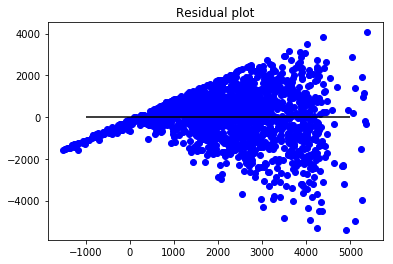

In [40]:
x_plot = plt.scatter(ypred, (ypred - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

In [41]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.025, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_test)

#calculating mse

mse = np.mean((pred - y_test)**2)

In [42]:
mse

1422234.9804071211

In [43]:
ridgeReg.score(x_test,y_test)

0.5347281520964839

In [44]:
ridgepred = ridgeReg.predict(Xt)

In [45]:
for i in ridgepred:
    print(i)

1649.0430733523522
1198.4031233256642
1835.2395203285332
2179.670497627999
4872.064267158579
2177.5373435436863
1126.9407750877199
2577.6630390190385
1583.0376826627125
2674.601920149887
1544.8349615868196
1394.7092223854356
2290.6354303846338
1794.0137625395178
921.4296965266894
2304.8782028739474
3156.827738980022
3249.1562259206607
3010.5672730645106
988.0292640836328
2704.1502224380374
3612.7674365529097
1064.6567855082553
940.3377415489531
2848.349634574162
1455.6066600828453
837.3348587849864
2776.244893921115
4057.5132471348556
1883.0591667150707
-770.0518993696038
3385.7713070430095
1032.8820469270963
4708.318817868147
2254.333167109574
4525.473810237712
2512.931148249665
-64.7961423173108
2682.7893744508583
2925.3201508038856
2541.889192045551
-34.56346179578463
2322.6569322338437
2576.727424541784
1500.0275134836652
1738.186271163178
-1179.6411467492865
2883.5520818874274
3777.7053967149745
2229.209183307862
1188.7604679743722
1657.4863180684847
2610.9911111339093
1658.242988

3333.384854821707
225.23239329817807
2235.305268014681
2766.1111835321913
730.7816763076644
2264.798467899537
2786.680054152633
-1294.6396141225937
-583.9893756276343
161.18442937331497
2041.1292155799151
1952.919501819741
961.5686573448943
2705.9630739125605
2650.286617186721
2909.0513559307506
662.0598245748758
1645.2122476842956
1879.8586701225868
996.9435495123394
2513.863578948643
1686.8219431513235
2309.1067232579494
2898.0181291478734
1016.4812355127001
3557.5175566572675
2399.793681282955
2548.293924891027
2237.5835795793037
2617.149919961525
1844.5465362834238
2725.4950215497033
1924.051939215794
765.4990880863243
2151.9762075115527
617.0809019133571
427.032012574482
3635.8347697397844
-565.7538138749181
4178.996100760014
2489.5811224345553
2992.8967476032226
1684.4775258176442
2103.7859474334455
2608.545015441463
2894.3960196924972
2404.4388803896745
2220.620959402812
1518.3329953940051
903.5501079793453
3961.931845855091
1696.6344348692996
1067.4400419932745
867.300081842175

3205.9373950173344
4217.956162461076
4050.562347584961
1414.8633606938824
1692.7423619302836
4210.458452789677
3038.5895071155333
965.5864546257822
3129.291443333412
2123.5906075913767
3105.8495831200703
2476.5204777855924
3826.2178951140218
2130.404210954572
1661.9955596621407
684.9359869628252
2918.728483474877
2962.8092423439816
3889.660484637476
-948.9083807978633
459.95986059196525
1399.566004264771
2595.2066496074453
292.7687014789335
1856.3832485011108
2421.8380416685145
943.5738731026963
2023.7781613436578
1792.0722129846276
3158.0793126045724
1247.1564364693263
1790.8717905724056
2550.8262639229083
829.0139768197123
2105.194818284402
3566.8009765785687
2813.2009894948756
2671.6404392002355
3451.5936490226472
-365.38184035870404
2751.3781483691664
1680.090005051737
1911.6885700566422
666.9256135965852
2378.945533012696
1644.6333140374336
1852.3208633440759
1877.904499660157
3508.357096388809
5312.4414659745125
1652.7560661991106
2509.0423378682076
-782.2689536083636
3562.160871

3308.782478286141
2572.901386710712
3431.768290783139
-990.6585598284206
3594.614661162674
3082.4078666903574
2031.477917141619
787.4246579447731
1717.0451811724092
3425.9118487353267
2171.321698155945
3661.0300112072778
2720.427073527677
1579.392939462387
1738.3384776180364
3942.8877104335575
1804.1745102077616
2047.3073321983861
4212.187661705157
3813.4178171655253
3587.1321383893087
4968.828774703641
742.9702800027762
1021.3469837936595
972.7361168098855
4344.756789503463
890.4733991429173
1220.3734268544908
2263.3329463821615
1002.3380345064752
2906.357350866214
2620.0759242709632
2899.521079583576
2361.8192092410504
1680.212840346821
1634.5826938534597
2216.104491342546
83.11175676018934
4444.521053927474
2231.3807844878665
2142.286312845712
3.5812449308182295
2919.4363382295064
699.8945965214737
2530.1794034901563
2832.1682475076027
2526.644863235114
2563.4181286003704
4576.562382637147
821.8519304269842
3567.6115607280976
2985.214248976807
2487.7031748783834
821.2590344034127
50

In [46]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.0011, normalize=True)

lassoReg.fit(x_train,y_train)

lassopred = lassoReg.predict(x_test)

# calculating mse

mse = np.mean((lassopred - y_test)**2)

print(mse)



lassoReg.score(x_test,y_test)

1417369.5454966426


0.5363198369606857

In [47]:
lassotest=lassoReg.predict(Xt)

In [48]:
for i in lassotest:
    print(i)

1581.8152990146177
1237.2674818568603
1726.3239145722505
2238.916344059747
4946.134239058977
2222.5239888045016
1091.6748988218328
2571.262240892062
1565.0843520046033
2742.356504556239
1609.0579221991848
1369.678799659197
2298.108064722563
1749.6906707933886
897.5127516397922
2267.782211791452
3162.8468964675894
3256.981405526846
3019.7654354803335
879.1976000100672
2744.9743422168845
3681.0573799828626
1084.2403806299299
881.1392959702412
2862.6067082939653
1320.958577949607
802.5578816576017
2845.536852285263
4148.424836860314
1869.5972115001823
-861.9738963661491
3393.182764815693
980.8482308647331
4756.160277562021
2334.4147270637723
4564.8975352138505
2520.8048545713327
-234.09084317009047
2772.4120223376367
2929.39998105385
2532.0195432149085
-197.19340605718764
2424.6478826701214
2564.768612705526
1372.1226257258668
1759.06784061279
-1319.0853090416397
2903.71432118336
3836.319660132095
2280.866238332617
1213.2459874342412
1676.3880418681001
2685.85811992825
1722.243881116463
4

900.7558660738812
864.9267294810716
1087.7592286117533
3713.4668678399103
2067.9296274082353
675.1853150654713
3709.623855562756
2479.163998856353
2014.8709051923643
2988.8066557171355
2807.465980905921
1533.667220077953
596.9862323540747
2947.758083275042
2720.857173473807
2478.568634792189
2065.7282722653445
1353.8602002014268
3106.360262625303
3113.5958315012904
2542.2332997832236
436.0269423849909
4012.6607834560073
3663.1098875378366
-594.7886701177114
3685.9194785461495
2800.0004933511295
1027.4410613512423
3881.126116278915
3072.0280193533954
483.4605908943927
2190.039085414235
2579.4874249325353
3084.553853866235
-614.3292134127723
831.1526963012111
1266.392109608225
1452.3113298020185
2044.513752824571
2452.7955915680877
1523.1661361358206
2420.948943352768
2196.2735556915504
1551.1770947214773
2723.5913544802384
4789.0333733920725
2991.923299913367
4011.2603555624455
1209.3078677274998
1922.5595760728984
2366.646005799077
2086.4041630179486
3420.443542165247
3340.234292958834

2922.871071158953
3755.0207060875337
3424.1440201734367
1580.630159526616
3100.7367424982494
2432.9590894864014
2083.773209685496
794.532177259249
2842.5872842949693
1016.2300724260513
250.05215732561692
930.3143499908363
1867.068569662934
3958.7179639214455
1733.5700399096477
1488.1630630551845
3507.0384828872366
2465.7509311603644
2144.697046892851
1919.6516770858407
1673.7053125199018
1693.9002142660652
3006.5891758495645
1166.8976666116696
-595.3377414848098
2463.0141869873223
2091.1401306982207
2224.122062451924
1299.3057466618757
4053.8483649804575
2515.9414305733267
3386.0833961237477
2197.490576743994
1610.658236594371
856.7325583186973
2063.29430666806
1181.5599093072683
3032.268649416531
532.9592986510129
1748.8551248809817
2974.9912919570274
1407.723145831395
2959.0651601203895
1906.6959947715077
2317.0198732642752
4744.960052197704
2845.4223583037738
1471.470821858903
2564.349976304439
3890.018968248085
2542.267195800193
2542.7576752095533
692.6697881211894
3030.89928798573

2550.0716516439147
3603.6342267968057
777.347685960648
2986.2505841842444
3784.4655921943368
3208.030384460014
1383.7230391521507
1629.7073607033776
2951.8453425256475
-108.10747294800728
1532.6810045821567
899.0902433855545
2791.493688648125
3846.922649376601
2789.9917940189407
2738.950327426707
2254.0246159105545
2838.0345573595077
1719.296345827402
2931.444947036677
2418.028517654316
726.9028455369676
2041.8609136564046
755.9634925951145
2375.2793433677334
2354.689436784468
4082.021141901252
2008.7262849684412
3625.8840154516247
2831.6326400996104
1677.3330871678645
4134.459005789465
1772.9247652238619
2753.247497480897
1539.8155280429237
2057.7493132811733
3220.1347247649983
2929.65300907322
-176.556226883288
2540.5490426600186
3777.037859389937
849.4216429812554
2974.610286417979
801.4689238053672
-491.28222153795537
1339.0592722177294
4114.123285608673
3517.300684392464
1716.3312975535396
861.5834532052531
3036.461587092498
629.0279363331208
1460.7847436549023
2194.1140217258376


1556.9309315186588
3805.0692490218335
2971.7487041488093
1769.7882302663247
1279.7913823816202
1131.7516338124892
2782.2904725550184
2732.2775956889045
1339.0201398226818
2781.457225642727
1495.3999053892271
4571.527260451355
983.7569755463228
-1093.1168521115696
2533.243409396062
2196.3857805826365
4298.25928743932
2209.778812538752
3171.1549987223125
1188.3623096774145
3267.92672488674
1956.8720466899872
2772.7239173393114
-1309.638127681926
5148.826119023855
-151.00044780657583
3369.391519070982
3247.9018755711086
2523.78656324782
904.9288161268378
2970.932870734962
1184.6832525827945
995.8227652310284
1412.429294505746
2824.3425653782406
2671.082307356454
1781.3782097783155
1782.454661947897
2706.544169667485
2099.519221265032
2378.176923007352
2419.040555859985
2710.260266699175
2927.3680088941373
5329.459521503074
2304.8853026864226
1058.1064033150546
1696.0160378992691
2039.471226728967
2017.7978147086574
1651.825354590373
3332.1387965456115
1972.7587312165078
402.56710148545244

In [49]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_test)

#calculating mse

mse = np.mean((pred_cv - y_test)**2)


ENreg.score(x_test,y_test)



0.46972709722294254

In [50]:
enty=ENreg.predict(Xt)

In [51]:
for i in enty:
    print(i)

1937.4184881539745
880.2183673775421
2819.24372020991
1907.5910407069368
4599.299791482119
1918.287687598684
1015.6948798595536
2193.476834156824
1576.8022136927102
2421.605575089198
1344.9700488364892
1411.5191920789316
3031.8356199319387
2179.687269573498
551.8659155507753
2652.8385548889087
3172.2921560126406
3195.8822139372614
2633.224686991035
2057.503959013748
2473.553797074914
3699.5364632593764
820.0469235179537
1497.5504146150793
2770.9517060565463
2326.6655927483303
700.1033501677341
2593.863818471634
3895.5912340194245
1776.1694091569998
-221.5835950383813
3266.688094080807
872.2180869086237
4338.781664408619
2070.1882093592653
4134.234325105901
2180.9111795686313
835.0889720211608
2495.455549573086
2534.4800286564905
2448.1514734170487
871.6923970988305
2211.2807028605657
2468.6317011050232
2447.9475295332522
1497.1900474253848
-79.89495221794664
2821.3885076577935
3832.2873040555587
2016.2457391800208
960.4086149294244
1402.7546190179019
2339.8329579265137
1420.21162676047

2038.9538546712656
1524.223508544963
4310.715751281507
1722.0954877958493
1397.695399208068
818.6720938499434
1608.2016617238173
1539.5904968100567
1894.8082295496547
3673.282748551829
4003.0587579495987
2097.952837612949
1307.226700779352
1737.0751087181852
1098.0671955241774
1433.7764403174792
991.6984934292682
1870.5954714823015
404.5937343227813
1936.444136676177
2296.9912358105694
2989.587126679725
1994.2570526535683
830.7094774598058
3144.7488686223305
1735.9930128313413
863.9493659098148
1690.9538922608635
1803.7635519494338
866.6193082709451
1436.664943866098
1530.4248473996513
470.99413061133237
1975.0134477567622
3152.790857969383
1455.1636716347716
3529.045058912342
1095.713537053453
2100.547816891001
3790.164283777848
2841.6881701767115
1730.7504943087379
2390.648725619607
2144.506165962533
2821.110018096002
1084.7608812751732
2128.756438706375
2072.0079213675763
3996.3217239980295
2072.0504240694754
2666.557044387101
2986.3160235243195
3853.162362562296
455.7588689353945
1

1635.5196716338196
722.6829134014629
846.209874130027
1788.9436408818574
750.0496895865524
2168.1022386362374
586.4423590677759
2773.993132709124
1116.771758099423
2665.8426657056634
523.1651901094629
2479.435156702987
2017.487804158532
3978.5928980660065
2921.583059260235
1983.8887963101624
3040.555094349833
3807.4190313304152
3685.0179495936636
2534.903867168982
3193.866100272965
2621.168146244588
2617.3590696990377
2608.5675051160756
836.5909545007453
1157.3225788373375
1092.82497514947
1717.4644691347057
3292.070862352569
1559.2474160187212
1568.192048617339
2591.904386293075
1379.7015658420178
1685.5621641279772
2600.6783621097675
3793.867671919622
1568.9996883578297
2848.7075233177034
1364.7270262507145
1948.9309326560556
597.7070209177198
1523.3123643281579
1956.1622039824651
783.0594142605721
2184.4301330654907
811.787182641433
1280.564171761258
1836.4535645218625
4331.360098166298
588.5874098152617
2926.5354928302268
855.8373938535628
3034.1059745638095
2345.2848003615404
3685

1653.2501712451062
2974.375731990217
3422.1282646774307
2491.943979826038
974.791895055504
2726.2689166285736
3067.1541951147365
3034.2050911648585
1656.846771893985
1755.6368156208746
1035.4075808995794
2888.8622012026854
541.8026945495617
244.70620480614912
2465.8258463959646
1156.7869841327752
1045.7273494584028
2268.88654361612
3912.9178328267917
2366.83895356405
3785.631329307117
3949.585688191839
2108.093701759714
935.4246521775121
2607.532670861185
1388.39725844522
4147.053536870355
1919.0362662721027
1612.137643040698
929.5754050374071
1462.736911259973
3356.269874514288
1363.5900457055272
1649.6392208817979
2762.240463298843
4119.074967357406
1137.9146800103113
879.1202708717524
3522.952294546413
3660.9937764538035
2673.991226827337
1960.044398109881
2600.167705728921
2262.0041598290313
1855.3167956845746
3206.197893894984
3603.7262067501497
3960.3412469503073
2317.097081929333
1541.074374027361
1574.1183558970429
2773.8861903732936
2546.267272356543
926.644271005197
3790.5414

1987.0185711709019
1962.1180947179491
2517.7642462249364
2158.7130960937325
1661.374629885007
1654.9954962241095
2361.9139291175447
1985.0019943766806
-172.02080052130782
142.79582323605177
1182.5804318387914
2868.09816834173
1964.0213712658401
1342.1548598022678
1423.1271191840451
1644.3645390225815
3697.533105079945
2987.5568829068643
1922.1023834328894
2532.317228131275
1259.025780821899
1515.3669320097142
3504.4104630376387
3193.2610720269213
609.9242486664248
908.8732844816845
1755.3630675320069
728.5578862259533
1500.2307019040254
1923.533146079566
3983.4489018903014
1518.7174273148548
2823.681257007763
4599.881731567717
1479.9518331769846
3053.462986092625
1745.0395370500273
319.7014001786031
2208.586078453043
2672.0141276395357
756.8632199182969
1711.3277094952969
2900.2790735818726
2627.6453932808236
944.2706703336153
2625.9808709024737
1923.3543947654812
1638.9139437955387
4945.194911326497
1940.564659714244
3749.9368294714195
1846.2950165104862
3292.4026376390093
3702.171971

2647.003882298374
1823.4990901581668
1653.7338722023828
-113.49175768913437
1758.7350371867847
1884.9093066324122
802.0396024093654
1793.0533357604877
3091.666200783714
2523.6701959386337
3725.911821619615
3203.618716047681
1359.0032058225133
1223.9392092255025
2425.6206042571876
3480.1510788125943
1642.2594969004526
1632.9539105245913
5064.242496493568
3854.268248030583
2550.096533677355
3589.700040066421
2421.594273170706
4058.406043214405
1834.1721840736982
2332.9707449227444
2188.593548987665
452.2372906370142
4021.37182728115
1744.7042553914443
2558.959379467289
2618.8547308078146
4115.142727978094
2595.46989056278
2248.6649046850775
3541.6271280155606
2565.034443680123
794.664611356128
2416.393564951122
3604.621910389955
351.94008740731124
679.9628093334059
1702.0389238519024
3544.4362163432506
1389.5510429483215
1177.0889818413625
2181.959756249131
1695.955294056218
2831.4247835816927
1895.1971491722443
2381.396316125814
2854.39267614905
2889.494621937415
1990.4894608487502
2440

2346.952791097422
1797.9363910928682
1196.2128225997253
3036.099669728317
35.58827328073062
3147.8574513230997
3284.1459715564815
2839.232364402225
3187.962051414581
2708.0031474984553
1927.4140462968267
1128.9855514056148
1941.7273964272208
1757.693931150066
1883.6957694381895
2072.552271912892
417.7848847445091
1498.8583789051236
2521.654197332095
933.8764707812652
969.6519191181478
3232.6175071657754
69.492562337643
1681.6483589979666
4251.449052047166
1945.344167116295
1755.528624564794
530.5882735566349
1742.2143507769915
669.1649571025396
3871.2007535242738
2695.3954237617095
2733.1833444088816
2618.1970625800586
3869.50667771197
1496.4212668914379
1865.5245645513392
2768.411829262074
259.07814545745714
1255.6377856132058
3057.6429833638804
2145.89903574771
1775.6490087306543
2559.2050099735234
3338.9613226749225
2280.767121271121
4823.595166220462
1591.9009570398503
1441.3151609528368
3505.4013779343213
2676.2843370256683
974.2069774930123
2647.7573386559816
1098.2917554651108
1

2487.871838097178
731.5547550181041
1874.9676717984216
3226.306891558772
2944.612434157224
71.89087016418489
2883.478980676302
2143.5432409166674
3242.5202476084505
314.1150441960722
917.8512268182071
2066.0108999175786
2096.1067491630856
1184.8389362467487
1378.3703754487851
1041.020537315574
534.684141518984
2782.600669964922
864.0162839713912
3077.5994434415534
1001.5010941768492
2045.3617763712682
2366.465878989918
1048.1564096046068
1640.1990927936868
1617.2372800673543
1818.5269085444556
1181.776670711104
3634.4861233676666
1834.3646338755284
2246.9398663052916
2745.6773772249094
1672.3368836516802
820.2700038397143
3967.605095436972
3024.5390624543434
3374.017125619841
2630.9247045042093
1995.010222248015
3231.7915249918588
2503.046968093167
2515.8876012492046
2312.6223095249497
893.0763135131865
2572.074293338616
1780.8283062489913
2298.938928597563
3845.5345417928283
865.4585832358616
3318.8394049068165
3161.501390947554
3440.565142893257
3398.5045262009016
1270.3185540665277


In [52]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

C:\Users\Raakhal Rapolu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Raakhal Rapolu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [53]:
NN_model = Sequential()

In [54]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))


NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1664      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 166,529
Trainable params: 166,529
Non-trainable params: 0
_________________________________________________________________


In [55]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [56]:
history=NN_model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Train on 5454 samples, validate on 1364 samples
Epoch 1/500
5454/5454 [==============================] - 1s 131us/step - loss: 2576856.3477 - mean_squared_error: 2576856.3477 - val_loss: 1930075.9249 - val_mean_squared_error: 1930075.9249

Epoch 00001: val_loss improved from inf to 1930075.92485, saving model to Weights-001--1930075.92485.hdf5
Epoch 2/500
5454/5454 [==============================] - 0s 79us/step - loss: 1908515.3980 - mean_squared_error: 1908515.3980 - val_loss: 1914991.5257 - val_mean_squared_error: 1914991.5257

Epoch 00002: val_loss improved from 1930075.92485 to 1914991.52566, saving model to Weights-002--1914991.52566.hdf5
Epoch 3/500
5454/5454 [==============================] - 0s 81us/step - loss: 1857233.7143 - mean_squared_error: 1857233.7143 - val_loss: 1854216.8460 - val_mean_squared_error: 1854216.8460

Epoch 00003: val_loss improved from 1914991.52566 to 1854216.84604, saving model to Weights-003--1854216.84604.hdf5
Epoch 4/500
5454/5454 [=================

5454/5454 [==============================] - 0s 75us/step - loss: 1215375.4374 - mean_squared_error: 1215375.4374 - val_loss: 1340571.5191 - val_mean_squared_error: 1340571.5191

Epoch 00030: val_loss did not improve from 1305905.26393
Epoch 31/500
5454/5454 [==============================] - 1s 126us/step - loss: 1202203.2167 - mean_squared_error: 1202203.2167 - val_loss: 1391844.3706 - val_mean_squared_error: 1391844.3706

Epoch 00031: val_loss did not improve from 1305905.26393
Epoch 32/500
5454/5454 [==============================] - 0s 91us/step - loss: 1212503.3780 - mean_squared_error: 1212503.3780 - val_loss: 1353053.3501 - val_mean_squared_error: 1353053.3501

Epoch 00032: val_loss did not improve from 1305905.26393
Epoch 33/500
5454/5454 [==============================] - 0s 87us/step - loss: 1212281.0044 - mean_squared_error: 1212281.0044 - val_loss: 1305334.6452 - val_mean_squared_error: 1305334.6452

Epoch 00033: val_loss improved from 1305905.26393 to 1305334.64516, savin


Epoch 00061: val_loss did not improve from 1238071.84824
Epoch 62/500
5454/5454 [==============================] - 0s 86us/step - loss: 1218701.0107 - mean_squared_error: 1218701.0107 - val_loss: 1371513.7159 - val_mean_squared_error: 1371513.7159

Epoch 00062: val_loss did not improve from 1238071.84824
Epoch 63/500
5454/5454 [==============================] - 0s 87us/step - loss: 1226812.6745 - mean_squared_error: 1226812.6745 - val_loss: 1265085.8387 - val_mean_squared_error: 1265085.8387

Epoch 00063: val_loss did not improve from 1238071.84824
Epoch 64/500
5454/5454 [==============================] - 1s 128us/step - loss: 1158170.6030 - mean_squared_error: 1158170.6030 - val_loss: 1252005.1140 - val_mean_squared_error: 1252005.1140

Epoch 00064: val_loss did not improve from 1238071.84824
Epoch 65/500
5454/5454 [==============================] - 1s 114us/step - loss: 1166230.6736 - mean_squared_error: 1166230.6736 - val_loss: 1261110.1327 - val_mean_squared_error: 1261110.1327

E

5454/5454 [==============================] - 0s 87us/step - loss: 1152101.4479 - mean_squared_error: 1152101.4479 - val_loss: 1260749.5209 - val_mean_squared_error: 1260749.5209

Epoch 00094: val_loss did not improve from 1221952.56708
Epoch 95/500
5454/5454 [==============================] - 0s 86us/step - loss: 1175122.5805 - mean_squared_error: 1175122.5805 - val_loss: 1247447.3387 - val_mean_squared_error: 1247447.3387

Epoch 00095: val_loss did not improve from 1221952.56708
Epoch 96/500
5454/5454 [==============================] - 0s 87us/step - loss: 1125412.2663 - mean_squared_error: 1125412.2663 - val_loss: 1249186.4040 - val_mean_squared_error: 1249186.4040

Epoch 00096: val_loss did not improve from 1221952.56708
Epoch 97/500
5454/5454 [==============================] - 1s 100us/step - loss: 1150331.9977 - mean_squared_error: 1150331.9977 - val_loss: 1270231.8812 - val_mean_squared_error: 1270231.8812

Epoch 00097: val_loss did not improve from 1221952.56708
Epoch 98/500
545


Epoch 00126: val_loss did not improve from 1218479.14956
Epoch 127/500
5454/5454 [==============================] - 1s 93us/step - loss: 1127516.7761 - mean_squared_error: 1127516.7761 - val_loss: 1294757.5143 - val_mean_squared_error: 1294757.5143

Epoch 00127: val_loss did not improve from 1218479.14956
Epoch 128/500
5454/5454 [==============================] - 0s 86us/step - loss: 1135518.9204 - mean_squared_error: 1135518.9204 - val_loss: 1227868.3882 - val_mean_squared_error: 1227868.3882

Epoch 00128: val_loss did not improve from 1218479.14956
Epoch 129/500
5454/5454 [==============================] - 0s 87us/step - loss: 1140073.8297 - mean_squared_error: 1140073.8297 - val_loss: 1309582.0004 - val_mean_squared_error: 1309582.0004

Epoch 00129: val_loss did not improve from 1218479.14956
Epoch 130/500
5454/5454 [==============================] - 0s 87us/step - loss: 1155951.6313 - mean_squared_error: 1155951.6313 - val_loss: 1283190.7331 - val_mean_squared_error: 1283190.7331



Epoch 00159: val_loss did not improve from 1218479.14956
Epoch 160/500
5454/5454 [==============================] - 1s 94us/step - loss: 1126896.1677 - mean_squared_error: 1126896.1677 - val_loss: 1230799.1848 - val_mean_squared_error: 1230799.1848

Epoch 00160: val_loss did not improve from 1218479.14956
Epoch 161/500
5454/5454 [==============================] - 1s 95us/step - loss: 1125636.5990 - mean_squared_error: 1125636.5990 - val_loss: 1257059.6118 - val_mean_squared_error: 1257059.6118

Epoch 00161: val_loss did not improve from 1218479.14956
Epoch 162/500
5454/5454 [==============================] - 1s 96us/step - loss: 1130865.9013 - mean_squared_error: 1130865.9013 - val_loss: 1269998.5110 - val_mean_squared_error: 1269998.5110

Epoch 00162: val_loss did not improve from 1218479.14956
Epoch 163/500
5454/5454 [==============================] - 0s 86us/step - loss: 1150820.2712 - mean_squared_error: 1150820.2712 - val_loss: 1257013.9916 - val_mean_squared_error: 1257013.9916



Epoch 00192: val_loss did not improve from 1218479.14956
Epoch 193/500
5454/5454 [==============================] - 0s 86us/step - loss: 1121554.0625 - mean_squared_error: 1121554.0625 - val_loss: 1250648.2181 - val_mean_squared_error: 1250648.2181

Epoch 00193: val_loss did not improve from 1218479.14956
Epoch 194/500
5454/5454 [==============================] - 0s 88us/step - loss: 1116280.0088 - mean_squared_error: 1116280.0088 - val_loss: 1255104.3783 - val_mean_squared_error: 1255104.3783

Epoch 00194: val_loss did not improve from 1218479.14956
Epoch 195/500
5454/5454 [==============================] - 0s 88us/step - loss: 1124745.6887 - mean_squared_error: 1124745.6887 - val_loss: 1330506.5477 - val_mean_squared_error: 1330506.5477

Epoch 00195: val_loss did not improve from 1218479.14956
Epoch 196/500
5454/5454 [==============================] - 0s 86us/step - loss: 1137499.2211 - mean_squared_error: 1137499.2211 - val_loss: 1253401.5803 - val_mean_squared_error: 1253401.5803


5454/5454 [==============================] - 1s 122us/step - loss: 1114764.0223 - mean_squared_error: 1114764.0223 - val_loss: 1272330.1818 - val_mean_squared_error: 1272330.1818

Epoch 00225: val_loss did not improve from 1218479.14956
Epoch 226/500
5454/5454 [==============================] - 1s 154us/step - loss: 1115583.3252 - mean_squared_error: 1115583.3252 - val_loss: 1263600.0920 - val_mean_squared_error: 1263600.0920

Epoch 00226: val_loss did not improve from 1218479.14956
Epoch 227/500
5454/5454 [==============================] - 1s 141us/step - loss: 1139223.9068 - mean_squared_error: 1139223.9068 - val_loss: 1244886.7570 - val_mean_squared_error: 1244886.7570

Epoch 00227: val_loss did not improve from 1218479.14956
Epoch 228/500
5454/5454 [==============================] - 1s 123us/step - loss: 1114306.3379 - mean_squared_error: 1114306.3379 - val_loss: 1254537.2977 - val_mean_squared_error: 1254537.2977

Epoch 00228: val_loss did not improve from 1218479.14956
Epoch 229/


Epoch 00257: val_loss did not improve from 1218479.14956
Epoch 258/500
5454/5454 [==============================] - 0s 86us/step - loss: 1103776.8623 - mean_squared_error: 1103776.8623 - val_loss: 1259498.7148 - val_mean_squared_error: 1259498.7148

Epoch 00258: val_loss did not improve from 1218479.14956
Epoch 259/500
5454/5454 [==============================] - 0s 85us/step - loss: 1102427.8040 - mean_squared_error: 1102427.8040 - val_loss: 1277028.3790 - val_mean_squared_error: 1277028.3790

Epoch 00259: val_loss did not improve from 1218479.14956
Epoch 260/500
5454/5454 [==============================] - 0s 84us/step - loss: 1103837.6300 - mean_squared_error: 1103837.6300 - val_loss: 1263503.3636 - val_mean_squared_error: 1263503.3636

Epoch 00260: val_loss did not improve from 1218479.14956
Epoch 261/500
5454/5454 [==============================] - 0s 84us/step - loss: 1111992.7497 - mean_squared_error: 1111992.7497 - val_loss: 1280087.0982 - val_mean_squared_error: 1280087.0982



Epoch 00290: val_loss did not improve from 1218479.14956
Epoch 291/500
5454/5454 [==============================] - 1s 97us/step - loss: 1101037.6637 - mean_squared_error: 1101037.6637 - val_loss: 1277747.2295 - val_mean_squared_error: 1277747.2295

Epoch 00291: val_loss did not improve from 1218479.14956
Epoch 292/500
5454/5454 [==============================] - 1s 162us/step - loss: 1096136.5557 - mean_squared_error: 1096136.5557 - val_loss: 1261280.0865 - val_mean_squared_error: 1261280.0865

Epoch 00292: val_loss did not improve from 1218479.14956
Epoch 293/500
5454/5454 [==============================] - 1s 108us/step - loss: 1087337.3326 - mean_squared_error: 1087337.3326 - val_loss: 1301157.9216 - val_mean_squared_error: 1301157.9216

Epoch 00293: val_loss did not improve from 1218479.14956
Epoch 294/500
5454/5454 [==============================] - 1s 106us/step - loss: 1114498.2016 - mean_squared_error: 1114498.2016 - val_loss: 1278183.8262 - val_mean_squared_error: 1278183.82

5454/5454 [==============================] - 0s 86us/step - loss: 1100374.9372 - mean_squared_error: 1100374.9372 - val_loss: 1293165.6961 - val_mean_squared_error: 1293165.6961

Epoch 00323: val_loss did not improve from 1218479.14956
Epoch 324/500
5454/5454 [==============================] - 0s 86us/step - loss: 1084272.3881 - mean_squared_error: 1084272.3881 - val_loss: 1288950.8746 - val_mean_squared_error: 1288950.8746

Epoch 00324: val_loss did not improve from 1218479.14956
Epoch 325/500
5454/5454 [==============================] - 0s 86us/step - loss: 1088664.5719 - mean_squared_error: 1088664.5719 - val_loss: 1266494.6884 - val_mean_squared_error: 1266494.6884

Epoch 00325: val_loss did not improve from 1218479.14956
Epoch 326/500
5454/5454 [==============================] - 0s 86us/step - loss: 1076463.7285 - mean_squared_error: 1076463.7285 - val_loss: 1276741.6789 - val_mean_squared_error: 1276741.6789

Epoch 00326: val_loss did not improve from 1218479.14956
Epoch 327/500


5454/5454 [==============================] - 1s 104us/step - loss: 1071578.7271 - mean_squared_error: 1071578.7271 - val_loss: 1318379.7276 - val_mean_squared_error: 1318379.7276

Epoch 00356: val_loss did not improve from 1218479.14956
Epoch 357/500
5454/5454 [==============================] - 0s 87us/step - loss: 1057005.4140 - mean_squared_error: 1057005.4140 - val_loss: 1287030.6331 - val_mean_squared_error: 1287030.6331

Epoch 00357: val_loss did not improve from 1218479.14956
Epoch 358/500
5454/5454 [==============================] - 0s 87us/step - loss: 1097526.3385 - mean_squared_error: 1097526.3385 - val_loss: 1371414.2280 - val_mean_squared_error: 1371414.2280

Epoch 00358: val_loss did not improve from 1218479.14956
Epoch 359/500
5454/5454 [==============================] - 0s 87us/step - loss: 1074043.1162 - mean_squared_error: 1074043.1162 - val_loss: 1279942.1580 - val_mean_squared_error: 1279942.1580

Epoch 00359: val_loss did not improve from 1218479.14956
Epoch 360/500


Epoch 00388: val_loss did not improve from 1218479.14956
Epoch 389/500
5454/5454 [==============================] - 1s 93us/step - loss: 1067199.9961 - mean_squared_error: 1067199.9961 - val_loss: 1311377.1030 - val_mean_squared_error: 1311377.1030

Epoch 00389: val_loss did not improve from 1218479.14956
Epoch 390/500
5454/5454 [==============================] - 1s 105us/step - loss: 1059894.2524 - mean_squared_error: 1059894.2524 - val_loss: 1294625.4362 - val_mean_squared_error: 1294625.4362

Epoch 00390: val_loss did not improve from 1218479.14956
Epoch 391/500
5454/5454 [==============================] - 1s 106us/step - loss: 1054905.3478 - mean_squared_error: 1054905.3478 - val_loss: 1299980.0037 - val_mean_squared_error: 1299980.0037

Epoch 00391: val_loss did not improve from 1218479.14956
Epoch 392/500
5454/5454 [==============================] - 1s 108us/step - loss: 1055793.7939 - mean_squared_error: 1055793.7939 - val_loss: 1333555.9135 - val_mean_squared_error: 1333555.91

5454/5454 [==============================] - 0s 87us/step - loss: 1035005.5156 - mean_squared_error: 1035005.5156 - val_loss: 1356761.7093 - val_mean_squared_error: 1356761.7093

Epoch 00421: val_loss did not improve from 1218479.14956
Epoch 422/500
5454/5454 [==============================] - 0s 79us/step - loss: 1041732.9014 - mean_squared_error: 1041732.9014 - val_loss: 1349686.3391 - val_mean_squared_error: 1349686.3391

Epoch 00422: val_loss did not improve from 1218479.14956
Epoch 423/500
5454/5454 [==============================] - 0s 80us/step - loss: 1035679.5439 - mean_squared_error: 1035679.5439 - val_loss: 1354061.5620 - val_mean_squared_error: 1354061.5620

Epoch 00423: val_loss did not improve from 1218479.14956
Epoch 424/500
5454/5454 [==============================] - 0s 86us/step - loss: 1038364.7994 - mean_squared_error: 1038364.7994 - val_loss: 1288039.0304 - val_mean_squared_error: 1288039.0304

Epoch 00424: val_loss did not improve from 1218479.14956
Epoch 425/500


5454/5454 [==============================] - 0s 88us/step - loss: 1009353.3744 - mean_squared_error: 1009353.3744 - val_loss: 1334335.1455 - val_mean_squared_error: 1334335.1455

Epoch 00454: val_loss did not improve from 1218479.14956
Epoch 455/500
5454/5454 [==============================] - 0s 80us/step - loss: 1016276.3977 - mean_squared_error: 1016276.3977 - val_loss: 1355641.1452 - val_mean_squared_error: 1355641.1452

Epoch 00455: val_loss did not improve from 1218479.14956
Epoch 456/500
5454/5454 [==============================] - 1s 100us/step - loss: 1027639.0093 - mean_squared_error: 1027639.0093 - val_loss: 1326105.3433 - val_mean_squared_error: 1326105.3433

Epoch 00456: val_loss did not improve from 1218479.14956
Epoch 457/500
5454/5454 [==============================] - 1s 132us/step - loss: 1024690.8270 - mean_squared_error: 1024690.8270 - val_loss: 1426721.2342 - val_mean_squared_error: 1426721.2342

Epoch 00457: val_loss did not improve from 1218479.14956
Epoch 458/50


Epoch 00486: val_loss did not improve from 1218479.14956
Epoch 487/500
5454/5454 [==============================] - 1s 121us/step - loss: 1008096.6648 - mean_squared_error: 1008096.6648 - val_loss: 1348463.5189 - val_mean_squared_error: 1348463.5189

Epoch 00487: val_loss did not improve from 1218479.14956
Epoch 488/500
5454/5454 [==============================] - 1s 124us/step - loss: 992991.6712 - mean_squared_error: 992991.6712 - val_loss: 1350384.0792 - val_mean_squared_error: 1350384.0792

Epoch 00488: val_loss did not improve from 1218479.14956
Epoch 489/500
5454/5454 [==============================] - 1s 126us/step - loss: 1013650.0294 - mean_squared_error: 1013650.0294 - val_loss: 1328748.6796 - val_mean_squared_error: 1328748.6796

Epoch 00489: val_loss did not improve from 1218479.14956
Epoch 490/500
5454/5454 [==============================] - 1s 121us/step - loss: 995104.9686 - mean_squared_error: 995104.9686 - val_loss: 1327343.3077 - val_mean_squared_error: 1327343.3077


In [57]:

wights_file = 'Weights-074--1100891.51230.hdf5'
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [58]:
predictions = NN_model.predict(Xt)

In [59]:
for i in predictions:
    print(i)

[1776.6426]
[1443.6486]
[484.64594]
[2495.2634]
[5984.4097]
[1975.898]
[715.2009]
[2391.6948]
[1546.7845]
[3224.7996]
[1941.0726]
[1408.6531]
[578.2101]
[2197.5994]
[793.6544]
[2806.8376]
[3168.3328]
[2790.8079]
[2997.453]
[466.32275]
[2707.887]
[3804.303]
[909.2174]
[349.57812]
[2843.3733]
[475.6726]
[731.89636]
[2661.1936]
[3148.469]
[1879.2468]
[95.24873]
[2827.9426]
[597.75305]
[5780.6636]
[2690.0466]
[5484.2417]
[2465.7434]
[248.07211]
[3121.3523]
[2921.8884]
[2103.2966]
[269.81906]
[2865.673]
[2142.9119]
[507.73175]
[1805.0748]
[132.29321]
[2973.1472]
[4085.6055]
[2061.6702]
[958.9119]
[1754.7623]
[2998.8022]
[2074.0315]
[5162.3506]
[3217.933]
[2965.9504]
[529.56244]
[640.28845]
[1513.7596]
[2391.7048]
[3648.0723]
[3786.0708]
[1594.9819]
[2430.8965]
[2540.1372]
[2788.0046]
[4249.9946]
[2921.966]
[3560.2053]
[2959.1663]
[3072.195]
[1799.4065]
[4434.5015]
[4090.797]
[2835.1687]
[289.5515]
[2336.7825]
[610.72876]
[2239.368]
[2480.8174]
[1480.5735]
[1594.2617]
[3184.2932]
[2913.95]
[

[2654.08]
[2947.0947]
[1116.9163]
[1142.09]
[590.9752]
[3739.8293]
[3307.3914]
[5336.109]
[280.39636]
[261.128]
[859.89905]
[819.798]
[1629.6011]
[2006.4061]
[2650.3416]
[2636.778]
[2688.8918]
[499.68756]
[1785.209]
[2487.9658]
[3803.18]
[731.00476]
[1467.076]
[3628.5515]
[2321.952]
[669.6417]
[2679.9272]
[2294.1692]
[1530.9094]
[4182.789]
[1010.981]
[1844.8938]
[1760.6172]
[998.8527]
[5344.9165]
[2421.5015]
[1765.7323]
[302.4026]
[2983.4504]
[2767.3777]
[1338.4178]
[1344.2388]
[1039.3674]
[974.12646]
[1688.3677]
[4149.588]
[207.56941]
[321.6353]
[2896.2654]
[2845.5378]
[2901.3862]
[581.55237]
[3848.8982]
[2673.068]
[3049.03]
[2416.1978]
[3030.7256]
[4285.0825]
[2879.2312]
[1993.8564]
[792.6225]
[3800.9314]
[2209.0708]
[263.0739]
[3394.2751]
[1607.458]
[1280.1829]
[1869.3093]
[4014.6704]
[494.90842]
[2597.6067]
[4146.353]
[443.81335]
[2862.6638]
[2758.0247]
[2692.0955]
[1389.3276]
[527.3861]
[1791.3589]
[3764.4314]
[1961.8077]
[5765.945]
[384.69385]
[376.07126]
[1680.3176]
[1505.3303]


[411.6548]
[185.79735]
[1419.4686]
[1990.0023]
[1728.03]
[107.00081]
[1029.8259]
[5844.4507]
[2478.7507]
[1804.9792]
[2415.363]
[2961.2346]
[1539.0491]
[1249.1489]
[2875.32]
[3170.176]
[639.83246]
[86.68089]
[630.0767]
[3384.5813]
[3487.9453]
[4308.68]
[1815.512]
[6202.281]
[426.03607]
[5863.975]
[2541.755]
[1712.3394]
[781.77313]
[3361.8499]
[4089.7646]
[757.0871]
[960.1403]
[2034.417]
[1586.8136]
[3760.1301]
[4039.6853]
[1970.9536]
[4547.731]
[5327.7217]
[2166.407]
[533.0013]
[5217.382]
[1203.0889]
[1518.7593]
[2151.8699]
[6091.36]
[1859.0801]
[2102.5571]
[737.41364]
[100.02379]
[988.7879]
[3451.4285]
[1869.0532]
[1461.7377]
[4147.7026]
[2060.1536]
[3196.673]
[897.8143]
[5337.108]
[417.60706]
[3540.744]
[1790.0137]
[2474.2693]
[2512.4253]
[1517.6885]
[1040.454]
[1587.4493]
[228.07706]
[3778.7483]
[4012.348]
[859.1304]
[4780.8257]
[669.09955]
[3645.5994]
[479.91766]
[4191.805]
[3991.8257]
[361.13672]
[2892.494]
[1077.882]
[1009.219]
[1592.3602]
[1357.8097]
[2769.2031]
[2355.734]
[4067

[3557.9746]
[1541.8835]
[3099.4426]
[2575.0776]
[2263.682]
[4203.9395]
[3081.6165]
[4125.47]
[1425.8103]
[3456.2722]
[1409.7542]
[780.1301]
[3009.9548]
[4446.399]
[1188.4875]
[2852.8657]
[1852.7664]
[3549.5527]
[521.9208]
[3468.8103]
[875.26526]
[2117.6638]
[1266.6348]
[1598.3174]
[2268.842]
[1848.1476]
[1898.5273]
[1577.124]
[3156.851]
[3736.2966]
[2903.8416]
[1294.9197]
[5688.777]
[2744.4924]
[4415.689]
[899.0451]
[3439.4863]
[2608.4326]
[1867.555]
[468.35284]
[2625.329]
[2506.6619]
[3962.802]
[517.66943]
[1784.2407]
[2916.7708]
[1932.8761]
[512.7152]
[2865.1477]
[386.65518]
[546.2045]
[2693.0925]
[3248.9724]
[2757.0315]
[2854.5251]
[1055.5073]
[473.3645]
[742.1558]
[4060.6328]
[4235.858]
[2076.7937]
[248.23412]
[2000.227]
[1484.005]
[2072.0193]
[359.57904]
[3216.2966]
[2966.3708]
[2468.4749]
[2226.129]
[2094.0642]
[689.9536]
[2429.1433]
[2297.1523]
[1312.1559]
[2655.8103]
[3557.5547]
[1410.4811]
[2846.8108]
[2530.095]
[484.85687]
[1603.5745]
[4783.038]
[1219.323]
[558.57056]
[1792.2

[130.60869]
[1653.7734]
[506.06854]
[3587.64]
[614.30554]
[339.90454]
[2412.164]
[1448.8652]
[4218.735]
[2867.871]
[2017.0966]
[3905.683]
[1702.7837]
[2298.9587]
[2599.48]
[2688.7493]
[865.72577]
[2074.4216]
[1042.3987]
[2848.949]
[922.59283]
[753.86255]
[3823.8306]
[369.7871]
[3319.9768]
[2002.4336]
[4012.673]
[1191.6938]
[113.45584]
[2212.9226]
[2764.0134]
[2557.1895]
[2141.837]
[1719.0322]
[503.28107]
[2614.7292]
[4099.483]
[214.17265]
[3993.8872]
[2500.472]
[3223.4495]
[375.4072]
[269.0268]
[1987.2041]
[3862.367]
[2093.9458]
[1151.72]
[3651.047]
[120.76127]
[1328.7509]
[1492.4562]
[773.89154]
[2354.9307]
[1745.166]
[3157.029]
[2710.6582]
[124.6649]
[1695.0414]
[3239.298]
[3383.1692]
[1219.0901]
[3086.824]
[4277.833]
[2463.6501]
[3896.5698]
[4195.9395]
[783.92255]
[3733.2537]
[2767.6887]
[3460.715]
[600.5393]
[1899.4587]
[1641.9729]
[3980.6482]
[2050.3281]
[655.54565]
[4748.355]
[1155.1481]
[350.61792]
[1937.8481]
[186.52696]
[3487.0327]
[3416.6743]
[2552.54]
[675.7198]
[240.75223]


In [60]:

print(history.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


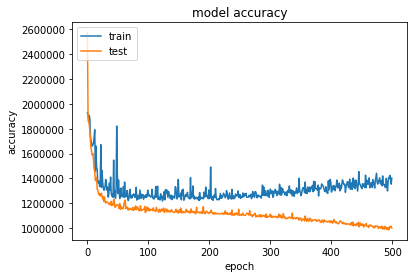

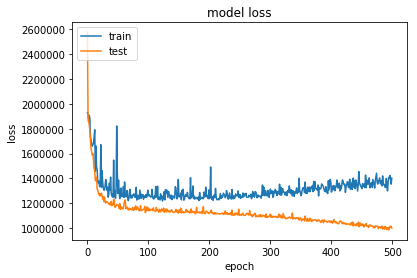

In [61]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()